In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import RandomOverSampler

In [2]:
cleveland_df = pd.read_csv('cleveland.csv')

In [3]:
cleveland_df["target"].unique()

array([1, 0], dtype=int64)

In [4]:
cleveland_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df = cleveland_df

In [6]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
import pandas as pd


has_na = df.isna().any().any()

missing_values_count = df.isna().sum()


print(f"Does the dataset have any missing values? {has_na}")
print("Count of missing values in each column:")
print(missing_values_count[missing_values_count > 0])  # Show only columns with missing values


Does the dataset have any missing values? False
Count of missing values in each column:
Series([], dtype: int64)


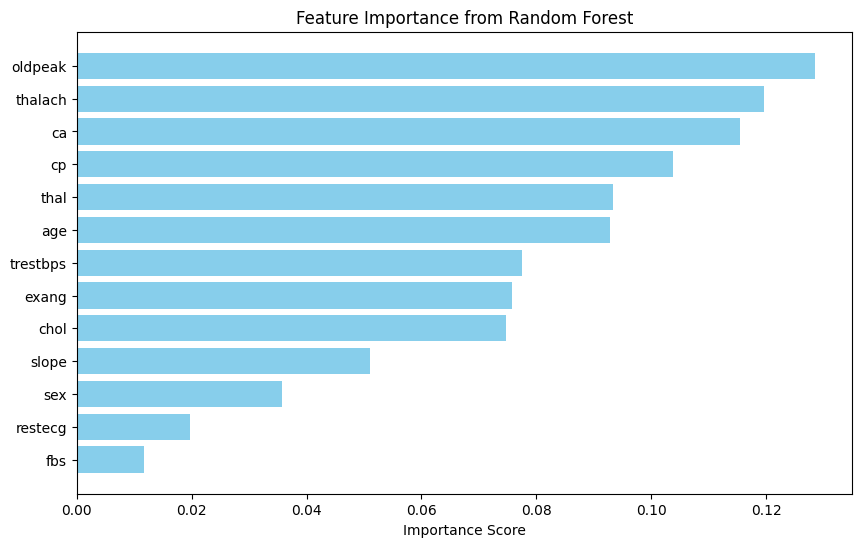

Top 4 features by importance:
    Feature  Importance
9   oldpeak    0.128485
7   thalach    0.119725
11       ca    0.115533
2        cp    0.103792


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = df.drop('target', axis=1) 
y = df['target']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


importances = rf_model.feature_importances_


feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  
plt.show()


print("Top 4 features by importance:")
print(feature_importances.head(4))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np


X = df[['oldpeak', 'thalach']].values  # Selecting 2 features for visualization

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(X)


df['cluster'] = clusters

# Identify outliers
outliers = clusters == -1

# Count outliers
num_outliers = np.sum(outliers)

print(f'Number of outliers detected: {num_outliers}')

# # Plotting the clusters, with outliers in a different color
# plt.figure(figsize=(6, 6))
# # Plot non-outliers (clusters >= 0)
# unique_clusters = np.unique(clusters)
# for cluster in unique_clusters:
#     if cluster != -1:
#         mask = clusters == cluster
#         plt.scatter(X[mask, 0], X[mask, 1], label=f'Cluster {cluster}', cmap='coolwarm')
# # Plot outliers (cluster = -1) in red
# outliers = clusters == -1
# plt.scatter(X[outliers, 0], X[outliers, 1], color='red', label='Outliers')

# plt.title('DBSCAN Clustering (Age vs Resting Blood Pressure)')
# plt.xlabel('Age')
# plt.ylabel('Resting Blood Pressure (trestbps)')
# plt.legend()
# plt.show()


Number of outliers detected: 8


In [ ]:

original_count = len(df)  # Original number of entries

# Filter out the outliers (cluster = -1)
df_cleaned = df[df['cluster'] != -1].drop('cluster', axis=1) 


cleaned_count = len(df_cleaned)  # Number of entries after cleaning

# Display the original and cleaned dataset counts
print(f'Original number of entries: {original_count}')
print(f'Number of entries after cleaning: {cleaned_count}')

# Display the cleaned dataset
print("\nCleaned dataset preview:")
print(df_cleaned.head())


Original number of entries: 303
Number of entries after cleaning: 295

Cleaned dataset preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   

   ca  thal  target  
0   0     1       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  


In [ ]:

X = df_cleaned.drop('target', axis=1) 
y = df_cleaned['target']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

X = X_train 
y = y_train   


print('Original class distribution:', Counter(y))


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train = X_resampled
y_train = y_resampled


print('Resampled class distribution:', Counter(y_resampled))


Original class distribution: Counter({1: 130, 0: 106})
Resampled class distribution: Counter({1: 130, 0: 130})


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report




train_data = lgb.Dataset(X_train, label=y_train)


params = {
    'objective': 'binary',  # Use 'multiclass' for multi-class classification
    'metric': 'binary_logloss',  # Change to 'multi_logloss' for multi-class
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'learning_rate': 0.05,
    'feature_fraction': 0.9,  # Percentage of features used in training
    'random_state': 42
}


model = lgb.train(params, train_data, num_boost_round=100)

t
y_pred = model.predict(X_test)
# If binary classification, convert probabilities to 0 or 1
y_pred_binary = (y_pred >= 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_binary)


roc_auc = roc_auc_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)




[LightGBM] [Info] Number of positive: 130, number of negative: 130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [16]:
print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.847457627118644
ROC AUC Score: 0.8479262672811061
Confusion Matrix:
[[24  4]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.87      0.84      0.85        31

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



In [ ]:
import optuna


def objective(trial):
    # Define the hyperparameters to tune
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.5),
        'num_leaves': trial.suggest_int('num_leaves', 100, 300),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.3, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.3, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 9),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 15),
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 15)
    }
    

    lgb_clf = lgb.LGBMClassifier(**param)
    lgb_clf.fit(X_train, y_train)

    y_pred = lgb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy


optuna.logging.set_verbosity(optuna.logging.WARNING)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


print("Best Hyperparameters:", study.best_params)


best_params = study.best_params

lgb_clf = lgb.LGBMClassifier(**best_params)
lgb_clf.fit(X_train, y_train)


y_pred = lgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best param: ", best_params)
print(f"Accuracy: {accuracy * 100:.2f}%")


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.911541559560932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.911541559560932
[LightGBM] [Warning] lambda_l1 is set=0.6530695584425572, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6530695584425572
[LightGBM] [Warning] lambda_l2 is set=1.5779372490760257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5779372490760257
[LightGBM] [Warning] bagging_fraction is set=0.6882212085862867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6882212085862867
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.911541559560932, colsample_bytree=1

In [18]:
print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9322033898305084
ROC AUC Score: 0.8479262672811061
Confusion Matrix:
[[24  4]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.87      0.84      0.85        31

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings


warnings.filterwarnings("ignore")


X = X_train 
y = y_train   



rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.87      0.84      0.85        31

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



In [ ]:

df_gen = pd.DataFrame(X_train, columns=X.columns)
df_gen['target'] = y_train  # Replace 'target' with your actual target column name

df_true = df_gen[df_gen['target']==1]
df_false = df_gen[df_gen['target']==0]

import pandas as pd
from ctgan import CTGAN


discrete_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'oldpeak']


ctgan = CTGAN()
ctgan.fit(df_true, discrete_columns)


synthetic_data = ctgan.sample(1000) 
true_data = pd.concat([df_true, synthetic_data], ignore_index=True)
print(synthetic_data)


ctgan.fit(df_false, discrete_columns)


synthetic_data = ctgan.sample(1000) 
false_data = pd.concat([df_false, synthetic_data], ignore_index=True)
print(synthetic_data)




     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     39    1   2       123   369    0        0      152      0      1.4   
1     60    1   2       116   382    1        1      147      0      0.0   
2     41    0   1       109   261    0        0      168      1      1.6   
3     26    0   1        91   234    0        1       96      1      0.5   
4     44    0   3        97   204    0        1      162      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
995   46    1   3       109   159    0        0      143      1      0.0   
996   43    0   1       143   322    1        0      166      0      0.6   
997   63    1   3        87   248    0        1      145      0      0.0   
998   43    1   2       124   183    0        0      193      0      2.4   
999   46    1   1       130   270    0        0      158      0      1.2   

     slope  ca  thal  target  
0        2   0     3       1  
1        2   0     2     

In [21]:
final_data = pd.concat([false_data, true_data], ignore_index=True)

X_train_new = final_data.drop(columns=['target'])
y_train_new = final_data['target']
print(X_train_new.shape)
print(X_test.shape)

%store final_data

(2260, 13)
(59, 13)
Stored 'final_data' (DataFrame)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report




train_data = lgb.Dataset(X_train_new, label=y_train_new)


params = {
    'objective': 'binary',  # Use 'multiclass' for multi-class classification
    'metric': 'binary_logloss',  # Change to 'multi_logloss' for multi-class
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'learning_rate': 0.05,
    'feature_fraction': 0.9,  # Percentage of features used in training
    'random_state': 42
}

# Step 3: Train the model
model = lgb.train(params, train_data, num_boost_round=100)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)
# If binary classification, convert probabilities to 0 or 1
y_pred_binary = (y_pred >= 0.5).astype(int)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)

# Evaluate the classifier
roc_auc = roc_auc_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


[LightGBM] [Info] Number of positive: 1130, number of negative: 1130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 2260, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8135593220338984
ROC AUC Score: 0.8139400921658985
Confusion Matrix:
[[23  5]
 [ 6 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.83      0.81      0.82        31

    accuracy                           0.81        59
   macro avg       0.81      0.81      0.81        59
weighted avg       0.81      0.81      0.81        59



In [27]:
import optuna

# Objective function for hyperparameter tuning
def objective(trial):
    # Define the hyperparameters to tune
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.5),
        'num_leaves': trial.suggest_int('num_leaves', 10, 300),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 200),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 15),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 15),
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 15)
    }
    
    # Train LightGBM model
    lgb_clf = lgb.LGBMClassifier(**param)
    lgb_clf.fit(X_train_new, y_train_new)

    # Make predictions and calculate accuracy
    y_pred = lgb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Silence Optuna output
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best hyperparameters
print("Best Hyperparameters:", study.best_params)

# Train with best parameters
best_params = study.best_params

lgb_clf = lgb.LGBMClassifier(**best_params)
lgb_clf.fit(X_train_new, y_train_new)

# Predictions and evaluation
y_pred = lgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best param: ", best_params)
print(f"Accuracy: {accuracy * 100:.2f}%")


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.7387940296259887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7387940296259887
[LightGBM] [Warning] lambda_l1 is set=11.563392492735195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11.563392492735195
[LightGBM] [Warning] lambda_l2 is set=0.5200154849393035, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5200154849393035
[LightGBM] [Warning] bagging_fraction is set=0.6195591036363911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6195591036363911
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.7387940296259887, colsample_bytre

In [28]:
# Best param:  {'learning_rate': 0.19281268331000573, 'num_leaves': 292, 'min_data_in_leaf': 92, 'feature_fraction': 0.2588234419452595, 'bagging_fraction': 0.11061118238220069, 'bagging_freq': 7, 'max_depth': 12, 'lambda_l1': 8.28830180626352, 'lambda_l2': 5.079997130385037}
# Accuracy: 96.61%

In [29]:
print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9152542372881356
ROC AUC Score: 0.8139400921658985
Confusion Matrix:
[[23  5]
 [ 6 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.83      0.81      0.82        31

    accuracy                           0.81        59
   macro avg       0.81      0.81      0.81        59
weighted avg       0.81      0.81      0.81        59



In [30]:
lgb_final = lgb_clf

In [31]:
%store X_train
%store y_train
%store X_test
%store y_test
%store X_train_new
%store y_train_new
%store lgb_final

Stored 'X_train' (DataFrame)
Stored 'y_train' (Series)
Stored 'X_test' (DataFrame)
Stored 'y_test' (Series)
Stored 'X_train_new' (DataFrame)
Stored 'y_train_new' (Series)
Stored 'lgb_final' (LGBMClassifier)


In [32]:
%store -r X_train
%store -r y_train
%store -r X_test
%store -r y_test
%store -r X_train_new
%store -r y_train_new
%store -r lgb_final

[LightGBM] [Warning] min_data_in_leaf is set=127, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=127
[LightGBM] [Warning] feature_fraction is set=0.9550659599378746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9550659599378746
[LightGBM] [Warning] lambda_l1 is set=3.8591243164940385, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8591243164940385
[LightGBM] [Warning] lambda_l2 is set=6.576302169745718, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.576302169745718
[LightGBM] [Warning] bagging_fraction is set=0.6459432507590782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459432507590782
[LightGBM] [Warning] bagging_freq is set=14, subsample_freq=0 will be ignored. Current value: bagging_freq=14


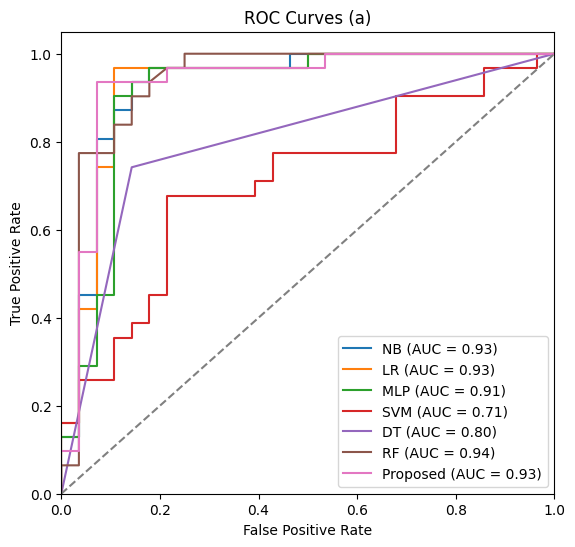

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Train Logistic Regression
model_lr = LogisticRegression(solver='liblinear', random_state=42)
model_lr.fit(X_train, y_train)

# Train MLP (Neural Network)
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_mlp.fit(X_train, y_train)

# Train Support Vector Machine
model_svm = SVC(probability=True, random_state=42)
model_svm.fit(X_train, y_train)

# Train Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Train Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


classifiers = {
    'NB': model_nb,     # Naive Bayes
    'LR': model_lr,     # Logistic Regression
    'MLP': model_mlp,   # Multilayer Perceptron
    'SVM': model_svm,   # Support Vector Machine
    'DT': model_dt,     # Decision Tree
    'RF': model_rf,     # Random Forest
    'Proposed': lgb_final  # Your proposed model
}

plt.figure(figsize=(14, 6))

# Subplot 1
plt.subplot(1, 2, 1)
for name, model in classifiers.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (a)')
plt.legend(loc="lower right")

# # Subplot 2
# plt.subplot(1, 2, 2)
# for name, model in classifiers.items():
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
#     fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves (b)')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()
